<a href="https://colab.research.google.com/github/kathir1406/Dataset-Correlation-Analysis-Dashboard/blob/main/dataset_correlation_analysis_dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Dataset Correlation Analysis Dashboard


FileUpload(value={}, accept='.csv', description='Upload')

Dataset Loaded Successfully!
Total Rows: 1000 | Columns: 17


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3



 Computing Correlation Matrix...


,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


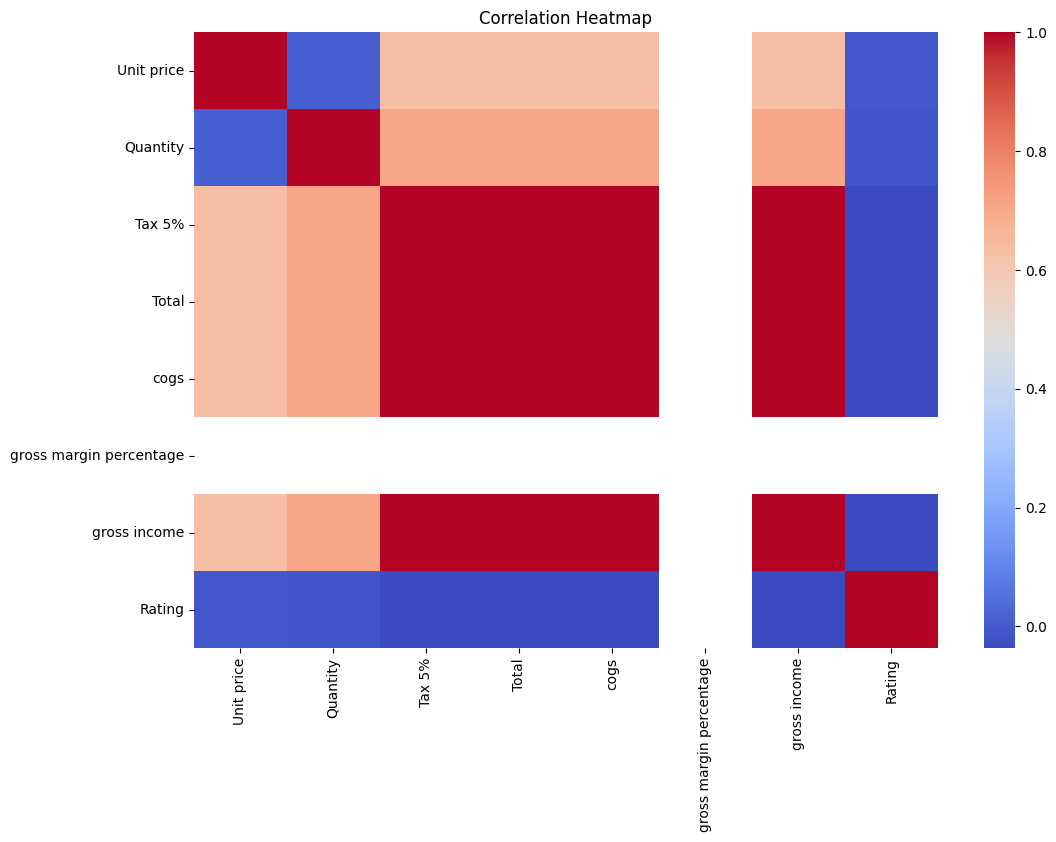


 Identifying Highly Correlated Features for Prediction...

 Highly Correlated Feature Pairs:
gross income ↔ Tax 5% (Correlation: 1.00)
gross income ↔ Total (Correlation: 1.00)
gross income ↔ cogs (Correlation: 1.00)
Tax 5% ↔ gross income (Correlation: 1.00)
Tax 5% ↔ Total (Correlation: 1.00)
Tax 5% ↔ cogs (Correlation: 1.00)
cogs ↔ Tax 5% (Correlation: 1.00)
Total ↔ cogs (Correlation: 1.00)
Total ↔ Tax 5% (Correlation: 1.00)
Total ↔ gross income (Correlation: 1.00)
cogs ↔ gross income (Correlation: 1.00)
cogs ↔ Total (Correlation: 1.00)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from google.colab import files
import io

# Dashboard Title
print(" Dataset Correlation Analysis Dashboard")

# File Upload Widget
upload_button = widgets.FileUpload(accept='.csv', multiple=False)
display(upload_button)

def process_large_file(change):
    try:
        uploaded_file = list(upload_button.value.values())[0]
        content = uploaded_file['content']

        # Load CSV in chunks to handle large files
        chunk_size = 100000  # Adjust chunk size as needed
        df_list = []
        for chunk in pd.read_csv(io.StringIO(content.decode("utf-8")), chunksize=chunk_size):
            df_list.append(chunk)

        # Combine all chunks into a single dataframe
        df = pd.concat(df_list, ignore_index=True)

        print("Dataset Loaded Successfully!")
        print(f"Total Rows: {df.shape[0]} | Columns: {df.shape[1]}")

        # Display first few rows
        display(df.head())

        # Select only numeric columns for correlation
        numeric_df = df.select_dtypes(include=['number'])

        if numeric_df.empty:
            print("\n No numeric columns found. Correlation analysis requires numerical data.")
            return

        # Compute Correlation Matrix
        print("\n Computing Correlation Matrix...")
        correlation_matrix = numeric_df.corr()

        # Display Correlation Table
        display(correlation_matrix)

        # Plot Heatmap
        plt.figure(figsize=(12, 8))
        sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Heatmap")
        plt.show()

        # Suggest rows for prediction based on highest correlated features
        print("\n Identifying Highly Correlated Features for Prediction...")
        threshold = 0.8  # Set a threshold for high correlation
        correlated_features = set()

        for i in correlation_matrix.columns:
            for j in correlation_matrix.columns:
                if i != j and abs(correlation_matrix.loc[i, j]) > threshold:
                    correlated_features.add((i, j))

        if correlated_features:
            print("\n Highly Correlated Feature Pairs:")
            for pair in correlated_features:
                print(f"{pair[0]} ↔ {pair[1]} (Correlation: {correlation_matrix.loc[pair[0], pair[1]]:.2f})")
        else:
            print("\n No highly correlated features above the threshold.")

    except Exception as e:
        print(f"\n Error: {str(e)}")

# Trigger File Processing on Upload
upload_button.observe(process_large_file, names='value')
